## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline  
# this line is needed to display the plots in the notebook

In [3]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
df['isBestSeller'].unique()
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

----
### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.


1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.

In [5]:
# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller']).sort_values(by=True, ascending=False)

crosstab_result

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


 - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

Grocery is more prevalent

In [6]:
crosstab_result2 =pd.crosstab(df['category'], df['isBestSeller'], normalize='index')*100
crosstab_result2 = crosstab_result2.sort_values(by=True, ascending=False)
crosstab_result2

isBestSeller,False,True
category,,
Grocery,94.186533,5.813467
Smart Home Security & Lighting,94.230769,5.769231
Health & Personal Care,94.231372,5.768628
Mobile Phone Accessories,95.752896,4.247104
Power & Hand Tools,96.466105,3.533895
...,...,...
"CD, Disc & Tape Players",100.000000,0.000000
General Music-Making Accessories,100.000000,0.000000
Snowboard Boots,100.000000,0.000000


### 2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [7]:
from scipy.stats import chi2_contingency

# Chi-square test for 'isBestSeller' and 'category'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.202700613874, 0.0)

In [8]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.12228294397605641

#### 3. **Visualizations**:
	    - Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [9]:
# Calculate total products per category (sum of best-sellers and non-best-sellers)
total_products_per_category = crosstab_result.sum(axis=1)  # Sum of True + False for each category

# Get top 10 categories by total products
top_categories = total_products_per_category.nlargest(10).index  # Adjust n=10 to 20 if needed

# Filter the crosstab to include only top categories
filtered_crosstab = crosstab_result.loc[top_categories]

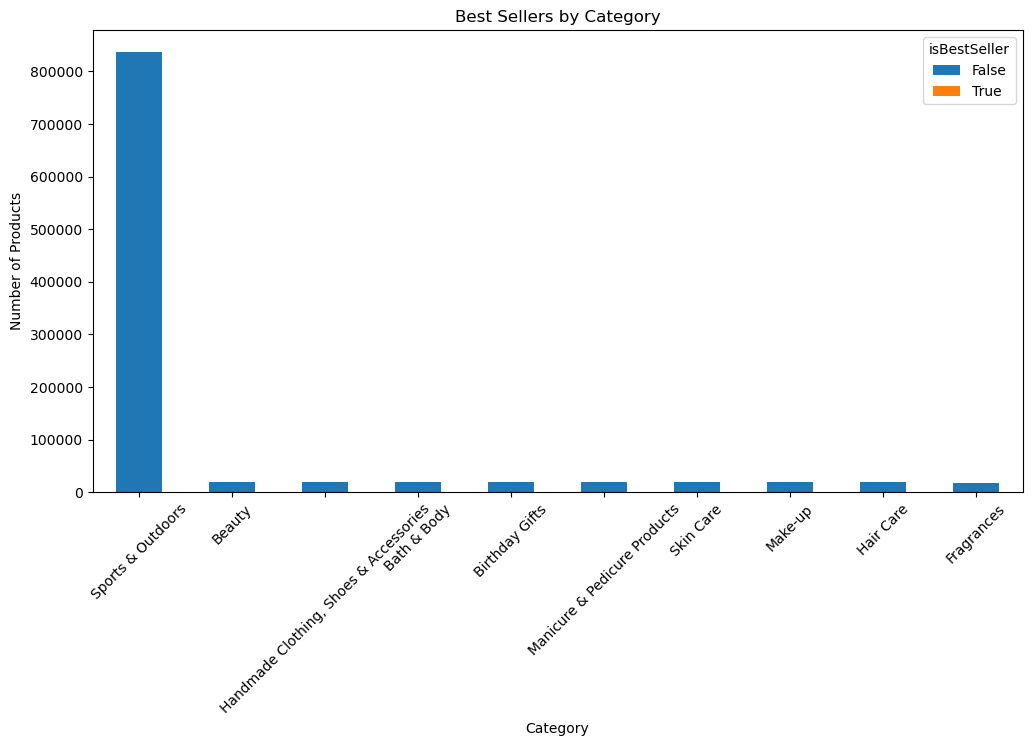

In [10]:
filtered_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Best Sellers by Category')
plt.ylabel('Number of Products')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='isBestSeller', labels=['False', 'True'])

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.


0. **Preliminary Step: Remove outliers in product `prices`.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*



In [11]:
# Calculate Q1, Q3, and IQR for the 'price' column
Q1 = df['price'].quantile(0.25)  # 25th percentile
Q3 = df['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 9.99, Q3: 45.99, IQR: 36.0


In [12]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check the shape of the new DataFrame
print(f"Original DataFrame: {df.shape}")
print(f"DataFrame without Outliers: {df_no_outliers.shape}")

Original DataFrame: (2443651, 9)
DataFrame without Outliers: (2115963, 9)




1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_65283/418314177.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


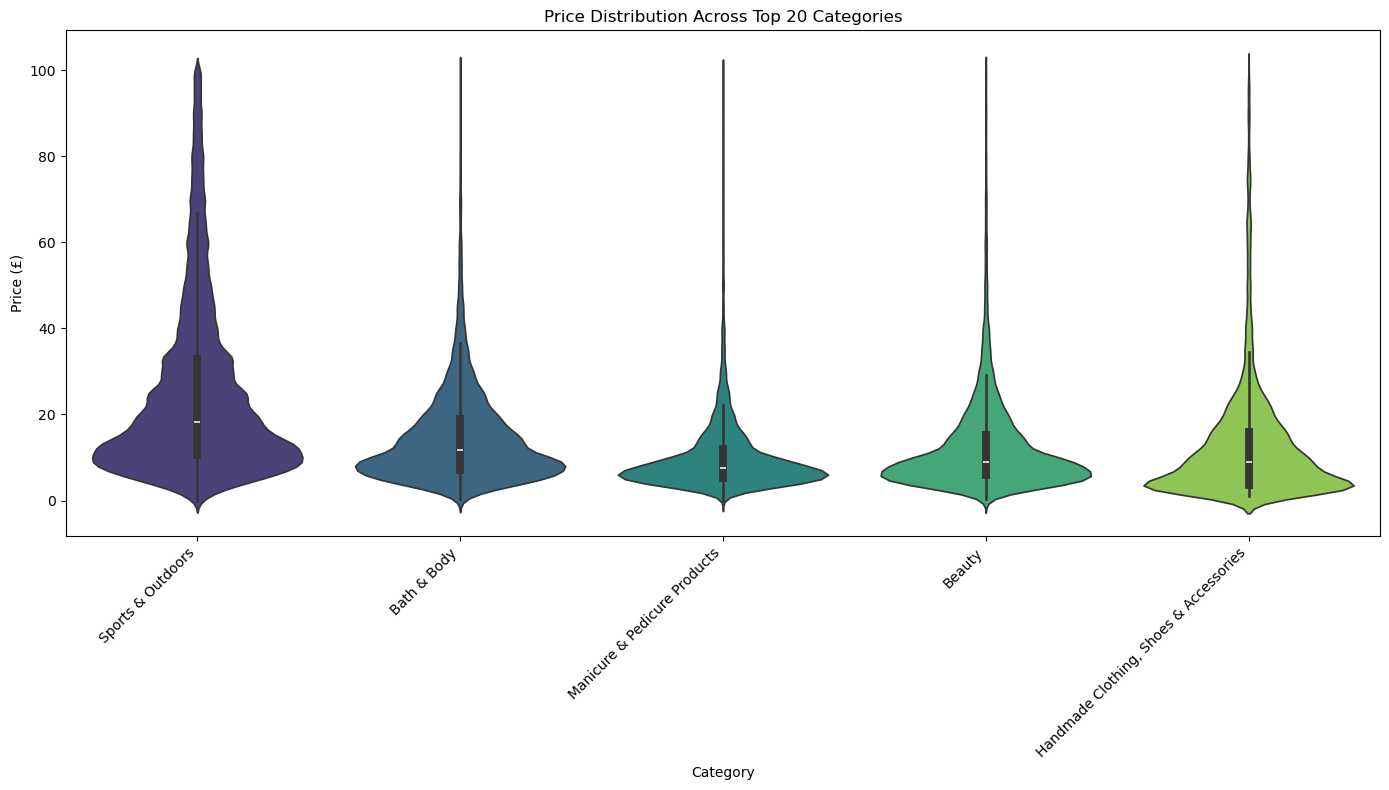

In [13]:
# Get the top 20 categories by product count
top_categories = df_no_outliers['category'].value_counts().nlargest(5).index

# Filter the DataFrame to include only top 20 categories
df_top_categories = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

# Set up the plot
plt.figure(figsize=(14, 8))

# Create the violin plot
sns.violinplot(
    x='category', 
    y='price', 
    data=df_top_categories, 
    palette='viridis'
)

# Add labels and formatting
plt.title('Price Distribution Across Top 20 Categories')
plt.xlabel('Category')
plt.ylabel('Price (£)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()




2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [14]:
# Calculate average price for each category
avg_price_by_category = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)

# Get the top 10 categories by average price
top_10_avg_price = avg_price_by_category.head(10)

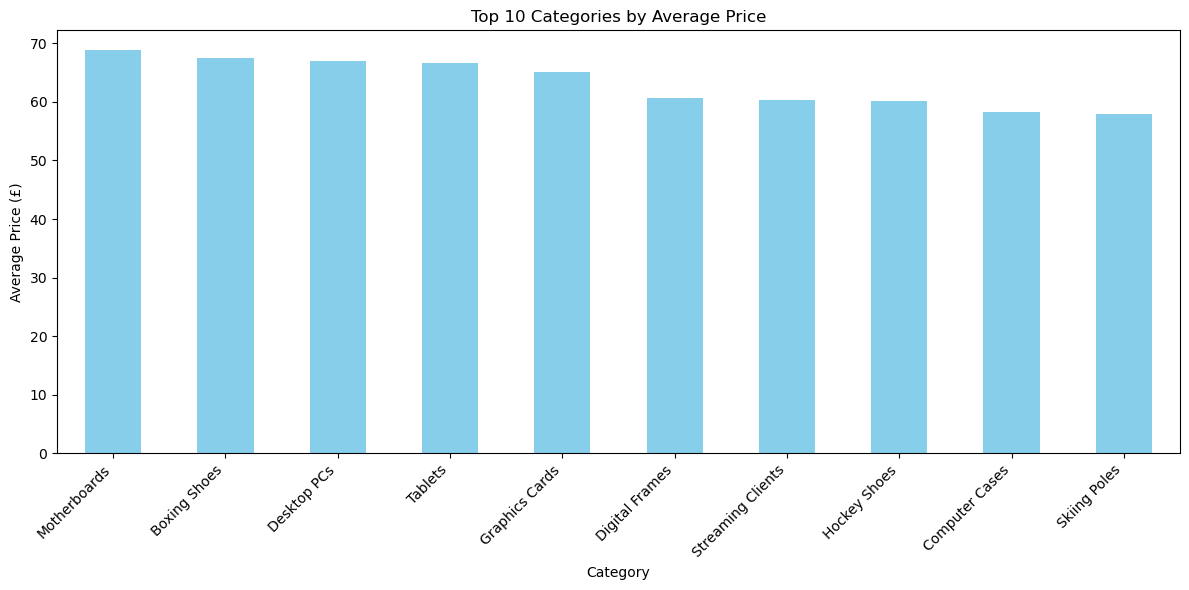

In [15]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Create the bar chart
top_10_avg_price.plot(kind='bar', color='skyblue')

# Add labels and formatting
plt.title('Top 10 Categories by Average Price')
plt.xlabel('Category')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [16]:
# Get the top 10 categories by product count
top_10_categories = df_no_outliers['category'].value_counts().nlargest(10).index

# Filter the DataFrame to include only top 10 categories
df_top_10_categories = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_65283/1119106788.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


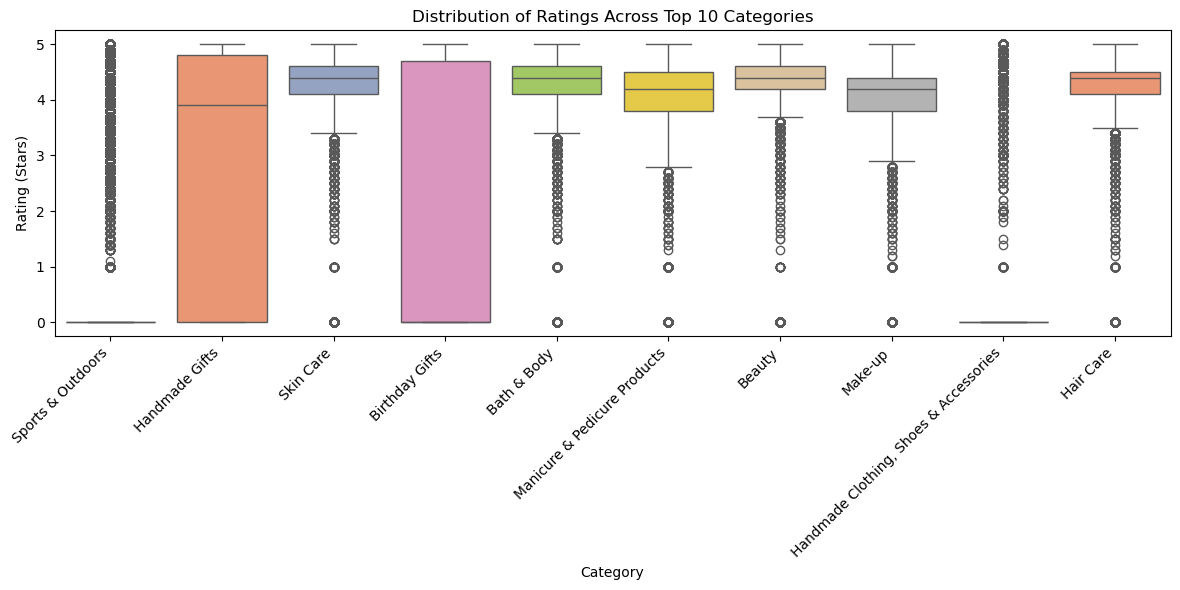

In [17]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(
    x='category', 
    y='stars', 
    data=df_top_10_categories, 
    palette='Set2'
)

# Add labels and formatting
plt.title('Distribution of Ratings Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Rating (Stars)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.


1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [18]:
# Calculate the correlation coefficient
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])

print(f"Correlation between Price and Ratings: {correlation:.2f}")

Correlation between Price and Ratings: -0.08






	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

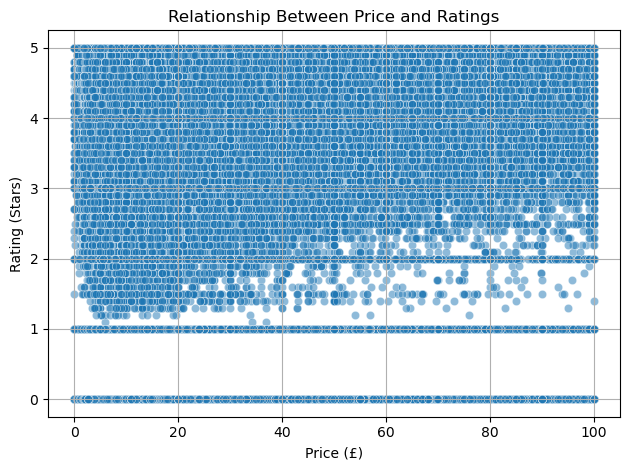

In [19]:
sns.scatterplot(
    x='price', 
    y='stars', 
    data=df_no_outliers, 
    alpha=0.5
)
# Add labels and title
plt.title('Relationship Between Price and Ratings')
plt.xlabel('Price (£)')
plt.ylabel('Rating (Stars)')
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()
plt.show()

In [20]:
# Select numerical columns
numerical_columns = df_no_outliers.select_dtypes(include=['float64', 'int64'])

# Display the numerical columns
print(numerical_columns.columns)

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')


In [21]:
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                        uid     stars   reviews     price  boughtInLastMonth
uid                1.000000  0.030288  0.020236  0.001717           0.017116
stars              0.030288  1.000000  0.083920 -0.077673           0.113994
reviews            0.020236  0.083920  1.000000 -0.008498           0.105624
price              0.001717 -0.077673 -0.008498  1.000000          -0.059051
boughtInLastMonth  0.017116  0.113994  0.105624 -0.059051           1.000000


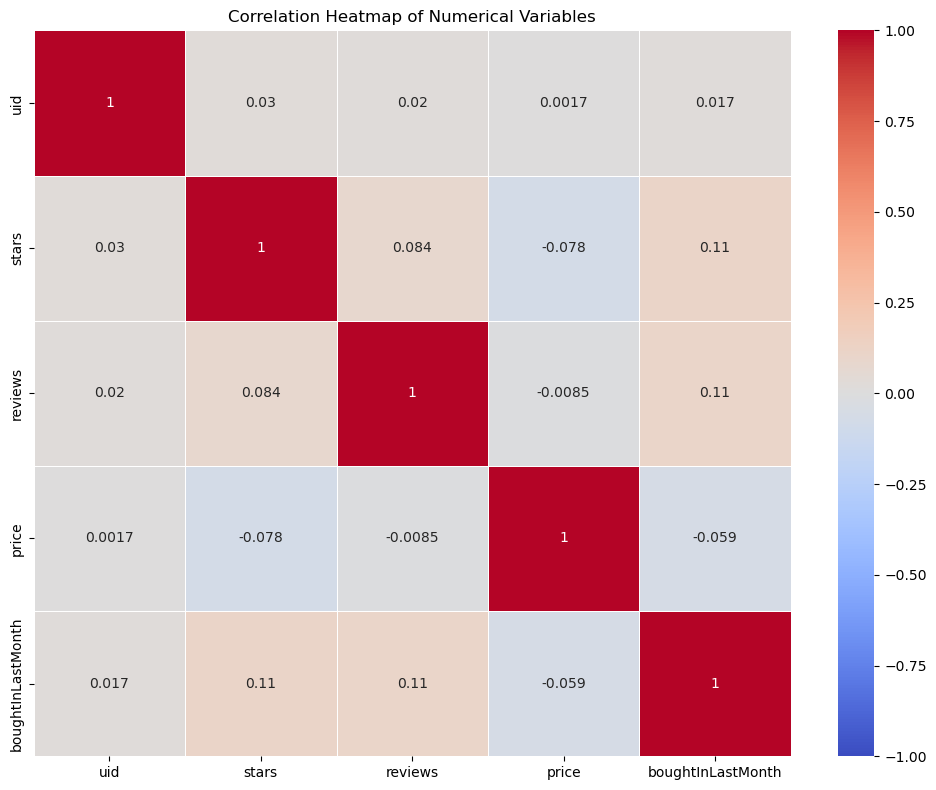

In [22]:
# Set up the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Add numbers to each cell
    cmap='coolwarm',  # Color map: blue for positive, red for negative
    vmin=-1,  # Minimum correlation value
    vmax=1,  # Maximum correlation value
    linewidths=0.5  # Add lines between cells
)

# Add title
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

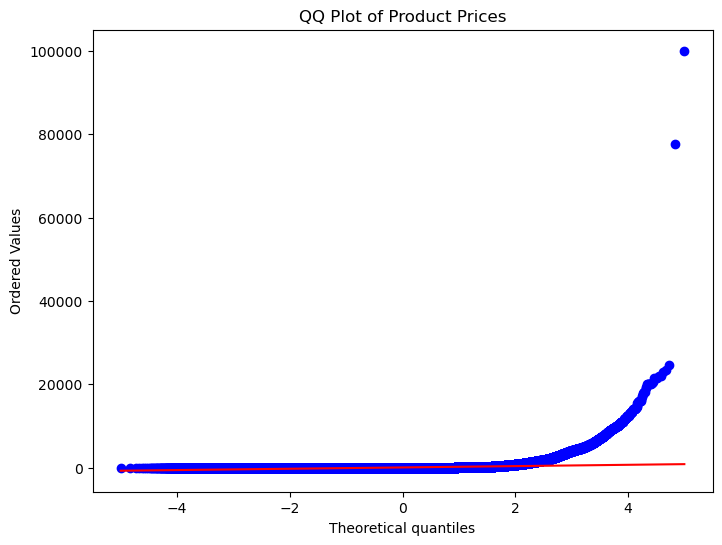

In [25]:
from scipy import stats

# Filter out non-positive prices (if any) for better visualization
df_filtered = df[df['price'] > 0]

# Generate QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.show()

Conclusions from the QQ Plot Severe Right-Skewness:

The data points deviate significantly from the red reference line, especially on the right side. This suggests that product prices are not normally distributed but rather highly skewed, with a long right tail. A few extreme outliers (very expensive products) are pulling the distribution to the right. Majority of Prices Clustered Near Zero:

Most of the points lie close to zero, meaning many products have relatively low prices. The extreme outliers at the top suggest a small number of very high-priced products.